In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv("Customer Acqusition.csv")
repayment = pd.read_csv("Repayment.csv")
spend = pd.read_csv("spend.csv")

In [3]:
customer.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
No          100 non-null int64
Customer    100 non-null object
Age         100 non-null int64
City        100 non-null object
Product     100 non-null object
Limit       100 non-null float64
Company     100 non-null object
Segment     100 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 6.3+ KB


## 1 a. If age less than 18, replace it with mean value

In [5]:
customer.loc[customer['Age']<18, ['Age']] = customer['Age'].mean()

## 1 b. Replace spend amt with 50% of limit if spend amt is more than the limit

In [6]:
spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46


In [7]:
spend_merged = pd.merge(spend,customer,on='Customer',how='left')

In [8]:
spend_merged.head(2)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [9]:
spend_merged.loc[spend_merged['Amount']>spend_merged['Limit'],['Amount']] = spend_merged['Limit']/2

## 1 c. Replace repayment with the limit if repayment amt is more than limit

In [10]:
repayment.head(3)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN


In [11]:
repayment_merged = pd.merge(repayment,customer,on='Customer',how='left')

In [12]:
repayment_merged.head()

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [13]:
repayment_merged.loc[repayment_merged['Amount']>repayment_merged['Limit'],['Amount']] = repayment_merged['Limit']

## 2. a. Distinct Customers

In [14]:
customer['Customer'].nunique() # 100 distinct customers

100

## 2. b. Distinct Categories

In [15]:
customer['Segment'].nunique()  # 5 distinct categories

5

## 2. c. Avg. Monthly Spend

In [16]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [17]:
spend_group = spend.groupby('Customer')

In [18]:
spend_group.sum()['Amount'].mean()/12  #Average Monthly Spend by Customers

303870.06182500004

## 2. d. Avg. Monthly Repayment

In [19]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [20]:
repayment_group = repayment.groupby('Customer')

In [21]:
repayment_group.sum()['Amount'].mean()/12  #Average Monthly Repayment by Customers

309862.56802499987

In [22]:
spend.sample(5)

,Sl No:,Customer,Month,Type,Amount
1388,1389,A59,31-Mar-06,PETRO,67835.30
483,484,A17,3-Jun-05,CAMERA,242080.71
1326,1327,A55,4-Apr-05,TRAIN TICKET,416430.15
1057,1058,A47,23-Feb-05,MOVIE TICKET,474320.80
636,637,A46,2-Apr-06,AIR TICKET,124053.97


In [23]:
spend['Month2'] = spend['Month'].str[-6:-3]

In [24]:
repayment.sample(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
383,384.0,A12,6-May-06,16888.10,NaN
942,943.0,A33,5-Feb-04,450994.42,NaN


In [25]:
repayment['Month2'] = repayment['Month'].str[-6:-3]

In [26]:
repayment.sample(2)

,SL No:,Customer,Month,Amount,Unnamed: 4,Month2
115,116.0,A14,1-Feb-05,262549.83,NaN,Feb
1050,1051.0,A40,3-Jan-04,213328.24,NaN,Jan


In [27]:
spend.sample(2)

,Sl No:,Customer,Month,Type,Amount,Month2
765,766,A30,15-Jan-04,SHOPPING,67694.98,Jan
687,688,A39,20-Nov-05,FOOD,60263.41,Nov


In [28]:
monthly_repayment = repayment.groupby('Month2')

In [29]:
monthly_repayment_df = monthly_repayment.sum()

In [30]:
monthly_repayment_df

,SL No:,Amount,Unnamed: 4
Month2,,,
Apr,116962.0,38947411.98,0.0
Aug,36305.0,12473672.01,0.0
Dec,17206.0,6877390.86,0.0
Feb,173975.0,56716405.02,0.0
Jan,237417.0,78193605.26,0.0
Jul,36256.0,12422103.93,0.0
Jun,33944.0,10591078.90,0.0
Mar,166430.0,52922437.64,0.0
May,198560.0,68540119.66,0.0


In [31]:
monthly_repayment_df.columns

Index(['SL No:', 'Amount', 'Unnamed: 4'], dtype='object')

In [32]:
monthly_repayment_df.drop(['SL No:','Unnamed: 4'], axis=1, inplace=True)

In [33]:
monthly_repayment_df.rename(columns = {'Amount':'Repayment Amount'}, inplace=True)

In [34]:
monthly_repayment_df

,Repayment Amount
Month2,
Apr,38947411.98
Aug,12473672.01
Dec,6877390.86
Feb,56716405.02
Jan,78193605.26
Jul,12422103.93
Jun,10591078.90
Mar,52922437.64
May,68540119.66


In [35]:
monthly_spend = spend.groupby('Month2')

In [36]:
monthly_spend_df = monthly_spend.sum()

In [37]:
monthly_spend_df

,Sl No:,Amount
Month2,,
Apr,110869,35500777.13
Aug,31773,9914365.80
Dec,21518,5851636.57
Feb,178927,55462857.52
Jan,262339,89421175.61
Jul,31731,11257776.06
Jun,42490,13514434.15
Mar,173103,56885086.04
May,156569,50668174.93


In [38]:
monthly_spend_df.drop(['Sl No:'], axis=1, inplace=True)

In [39]:
monthly_spend_df.rename(columns = {'Amount':'Spend Amount'}, inplace=True)

In [40]:
monthly_spend_df

,Spend Amount
Month2,
Apr,35500777.13
Aug,9914365.80
Dec,5851636.57
Feb,55462857.52
Jan,89421175.61
Jul,11257776.06
Jun,13514434.15
Mar,56885086.04
May,50668174.93


In [41]:
monthly_profits_df = monthly_repayment_df.join(monthly_spend_df)

In [42]:
monthly_profits_df

,Repayment Amount,Spend Amount
Month2,,
Apr,38947411.98,35500777.13
Aug,12473672.01,9914365.80
Dec,6877390.86,5851636.57
Feb,56716405.02,55462857.52
Jan,78193605.26,89421175.61
Jul,12422103.93,11257776.06
Jun,10591078.90,13514434.15
Mar,52922437.64,56885086.04
May,68540119.66,50668174.93


In [43]:
monthly_profits_df['Monthly Profit'] = monthly_profits_df['Repayment Amount'] - monthly_profits_df['Spend Amount']

In [44]:
monthly_profits_df['Profit'] = 0.029*monthly_profits_df['Monthly Profit']

In [45]:
monthly_profits_df

,Repayment Amount,Spend Amount,Monthly Profit,Profit
Month2,,,,
Apr,38947411.98,35500777.13,3446634.85,99952.41065
Aug,12473672.01,9914365.80,2559306.21,74219.88009
Dec,6877390.86,5851636.57,1025754.29,29746.87441
Feb,56716405.02,55462857.52,1253547.50,36352.87750
Jan,78193605.26,89421175.61,-11227570.35,-325599.54015
Jul,12422103.93,11257776.06,1164327.87,33765.50823
Jun,10591078.90,13514434.15,-2923355.25,-84777.30225
Mar,52922437.64,56885086.04,-3962648.40,-114916.80360
May,68540119.66,50668174.93,17871944.73,518286.39717


In [46]:
profits_df = monthly_profits_df.drop(['Repayment Amount','Spend Amount','Monthly Profit'], axis = 1)

In [47]:
profits_df #Profit for the bank for each month

,Profit
Month2,
Apr,99952.41065
Aug,74219.88009
Dec,29746.87441
Feb,36352.87750
Jan,-325599.54015
Jul,33765.50823
Jun,-84777.30225
Mar,-114916.80360
May,518286.39717


## 2. f. Top 5 product types

In [48]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [49]:
customer.Product.value_counts() #Only 3 product types

Gold        38
Platimum    32
Silver      30
Name: Product, dtype: int64

## 2. g. City with max. spend

In [50]:
spend_merged.head()

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [51]:
spend_city_group = spend_merged.groupby('City')

In [52]:
spend_city_group.sum().sort_values('Amount') #Delhi is having maximum spend

,Sl No:,Amount,No,Age,Limit
City,,,,,
DELHI,74733,10918286.54,3371,4129.00,23700108.0
PATNA,74935,15260586.97,3573,4811.00,29000036.0
TRIVANDRUM,104061,15337155.87,4855,5570.98,31520052.0
CHENNAI,107785,22128635.65,4905,5756.00,41810055.0
BOMBAY,159026,28603127.38,6986,10304.98,60090128.0
BANGALORE,185872,40461647.02,8323,13289.66,84970247.0
CALCUTTA,192958,41108132.30,9398,10520.00,80150127.0
COCHIN,226380,45963513.50,10482,14259.68,95750182.0


## 2. h. Which age group spending more money?

In [53]:
spend_merged['Age Group'] = 'Child'
spend_merged.loc[(spend_merged['Age']>12) & (spend_merged['Age']<=18), 'Age Group'] = 'Adolescent'
spend_merged.loc[(spend_merged['Age']>18) & (spend_merged['Age']<60), 'Age Group'] = 'Adult'
spend_merged.loc[spend_merged['Age']>=60, 'Age Group'] = 'Senior Adult'

In [54]:
spend_merged.sample(5)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Age Group
147,148,A4,25-May-05,PETRO,5000.50,4,47.0,BOMBAY,Platimum,10001.0,C4,Govt,Adult
579,580,A18,21-Nov-06,AUTO,74647.08,18,34.0,BANGALORE,Silver,100000.0,C18,Salaried_MNC,Adult
32,33,A33,13-Sep-04,RENTAL,5001.00,33,19.0,BOMBAY,Platimum,10002.0,C15,Salaried_MNC,Adult
1229,1230,A45,11-Jul-06,CAMERA,248061.75,45,67.0,COCHIN,Gold,500000.0,C7,Salaried_Pvt,Senior Adult
1361,1362,A61,3-Dec-05,PETRO,62914.03,61,44.0,COCHIN,Gold,500000.0,C23,Govt,Adult


In [55]:
spend_merged_age_group = spend_merged.groupby('Age Group')

In [56]:
spend_merged_age_group.sum()

,Sl No:,Amount,No,Age,Limit
Age Group,,,,,
Adult,879445,1.704237e+08,40769,45201.3,344390632.0
Senior Adult,246305,4.935734e+07,11124,23440.0,102600303.0


## Adult Age-Group is spending more money

## 2. i. Top 10 Customers in terms of Repayment

In [57]:
repayment_merged.head()

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [58]:
repayment_merged_customer_group = repayment_merged.groupby('Customer')

In [59]:
repayment_merged_customer_group.sum().sort_values('Amount', ascending = False).head(10)

,SL No:,Amount,Unnamed: 4,No,Age,Limit
Customer,,,,,,
A61,45502.0,10539142.91,0.0,2318.0,1672.00,19000000.0
A60,45464.0,9876290.74,0.0,2280.0,1064.00,19000000.0
A13,10148.0,9572000.66,0.0,403.0,899.00,15500000.0
A43,31424.0,8489871.46,0.0,1333.0,651.00,15500000.0
A45,31486.0,8448334.87,0.0,1395.0,2077.00,15500000.0
A12,10117.0,8334760.16,0.0,372.0,1581.00,15500000.0
A14,10179.0,7943268.63,0.0,434.0,1441.19,15500000.0
A44,31455.0,7744730.12,0.0,1364.0,868.00,15500000.0
A39,31300.0,7622483.30,0.0,1209.0,2418.00,15500000.0


## Above table shows list of top 10 cutomers

## 3. Citywise spend on each product

In [60]:
spend_merged.head()

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Age Group
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult


In [61]:
product_df = spend_merged.groupby(['Product','City']).sum().drop(['Sl No:','No','Age','Limit'],axis=1)

In [62]:
product_df #Citywise Spend on each product

Amount
Product  City                   
Gold     BANGALORE   34212852.62
         BOMBAY      23888016.12
         CALCUTTA    28948029.55
         CHENNAI      7504852.70
         COCHIN      29925605.56
         DELHI        7728443.59
         PATNA        7601365.36
         TRIVANDRUM   6391189.56
Platimum BANGALORE    2710848.54
         BOMBAY       2581199.89
         CALCUTTA    10061993.27
         CHENNAI     13614532.10
         COCHIN      13301418.07
         DELHI         954459.47
         PATNA        5252438.32
         TRIVANDRUM   7910523.72
Silver   BANGALORE    3537945.86
         BOMBAY       2133911.37
         CALCUTTA     2098109.48
         CHENNAI      1009250.85
         COCHIN       2736489.87
         DELHI        2235383.48
         PATNA        2406783.29
         TRIVANDRUM   1035442.59

In [63]:
product_df2 = product_df.reset_index()

In [64]:
product_df2

,Product,City,Amount
0,Gold,BANGALORE,34212852.62
1,Gold,BOMBAY,23888016.12
2,Gold,CALCUTTA,28948029.55
3,Gold,CHENNAI,7504852.70
4,Gold,COCHIN,29925605.56
5,Gold,DELHI,7728443.59
6,Gold,PATNA,7601365.36
7,Gold,TRIVANDRUM,6391189.56
8,Platimum,BANGALORE,2710848.54
9,Platimum,BOMBAY,2581199.89


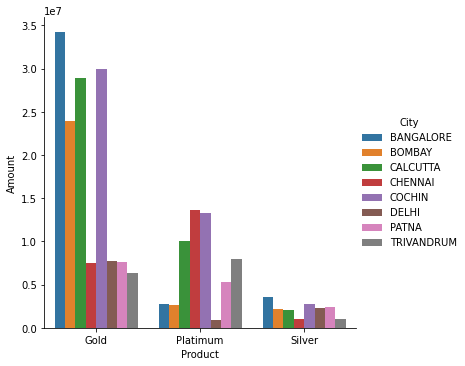

In [65]:
sns.catplot(x = 'Product', y = 'Amount', hue = 'City', kind = 'bar', data = product_df2)

## 4. a. Monthly comparison of total spends, city wise

In [66]:
spend_merged.head()

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Age Group
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult


In [67]:
spend_merged['Month2'] = spend_merged['Month'].str[-6:-3]

In [68]:
spend_merged.head()

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Age Group,Month2
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult,Jan
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult,Jan
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult,Jan
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult,Jan
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult,Jan


In [69]:
city_monthly_spend = spend_merged.groupby(['City','Month2']).sum().drop(['Sl No:','No','Age','Limit'], axis=1)

In [70]:
city_monthly_spend

Amount
City       Month2            
BANGALORE  Apr     4207980.48
           Aug      695061.95
           Dec      422167.24
           Feb     6734494.76
           Jan     9041796.84
           Jul     2228217.69
           Jun     1330685.90
           Mar     5362903.07
           May     6383115.13
           Nov     2260603.07
           Oct     1091602.61
           Sep      703018.28
BOMBAY     Apr     1873785.01
           Aug     1066744.75
           Dec      140040.71
           Feb     4276988.30
           Jan     5948993.33
           Jul      177726.32
           Jun     1172594.97
           Mar     5227850.50
           May     3891945.60
           Nov     2872049.40
           Oct      676005.70
           Sep     1278402.79
CALCUTTA   Apr     3457507.95
           Aug     1548354.02
           Dec       55001.50
           Feb     8150545.61
           Jan     9064864.90
           Jul     2234573.27
...                       ...
DELHI      Jun      511276.09
           Mar     2267149.02
           May     1600322.07
           Nov      391610.96
           Oct       64615.46
           Sep       50001.00
PATNA      Apr     2338179.53
           Aug      419383.64
           Dec       50000.00
           Feb     2353333.55
           Jan     4916205.55
           Jul       50000.00
           Jun      746186.13
           Mar     1437166.61
           May     2136586.80
           Nov      413677.87
           Oct      329537.34
           Sep       70329.95
TRIVANDRUM Apr     1199293.45
           Aug      453773.94
           Dec      640922.26
           Feb     2857123.89
           Jan     3704336.99
           Jul      260484.50
           Jun      400336.83
           Mar     2392316.51
           May     2813534.48
           Nov      143387.40
           Oct      285581.92
           Sep      186063.70

[96 rows x 1 columns]

In [71]:
city_monthly_spend2 = city_monthly_spend.reset_index()

In [72]:
city_monthly_spend2.head()

,City,Month2,Amount
0,BANGALORE,Apr,4207980.48
1,BANGALORE,Aug,695061.95
2,BANGALORE,Dec,422167.24
3,BANGALORE,Feb,6734494.76
4,BANGALORE,Jan,9041796.84


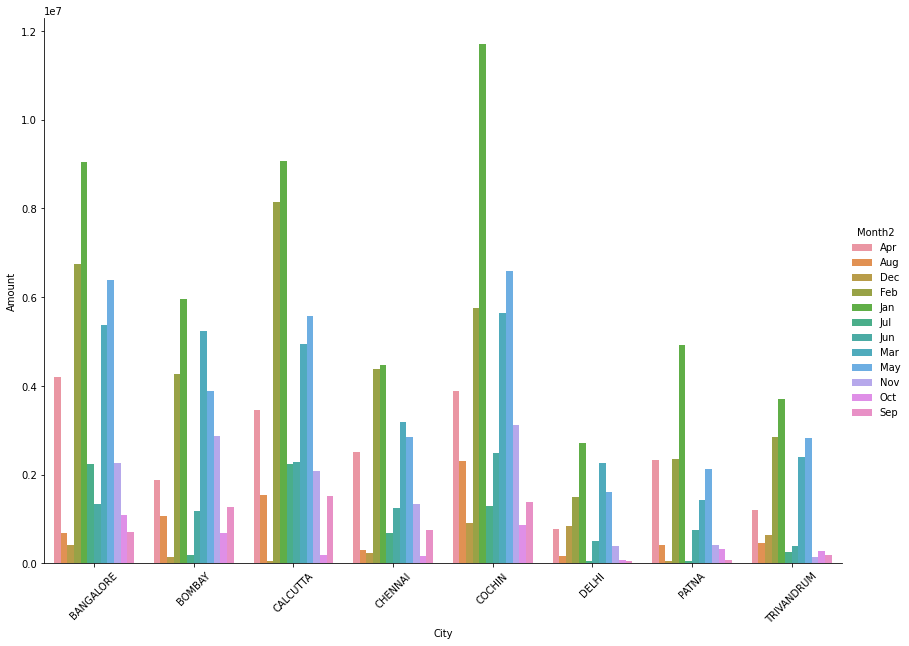

In [73]:
plot1 = sns.catplot(x = 'City', y = 'Amount', hue = 'Month2', kind = 'bar', data = city_monthly_spend2, height=8.27, aspect=11.7/8.27)
plot1.set_xticklabels(rotation=45);

## 4. b. Comparision of yearly spend on Air Tickets

In [74]:
spend.sample(5)

,Sl No:,Customer,Month,Type,Amount,Month2
1414,1415,A56,12-Jan-04,AIR TICKET,316155.21,Jan
983,984,A45,15-Jan-04,SANDALS,125247.80,Jan
1323,1324,A52,23-Mar-06,TRAIN TICKET,336196.48,Mar
1004,1005,A52,27-Apr-05,TRAIN TICKET,384129.51,Apr
358,359,A17,12-Aug-05,BUS TICKET,206451.17,Aug


In [75]:
#spend['Type'].value_counts()

In [76]:
spend['Year'] = '20'+spend['Month'].str[-2:]

In [77]:
spend.sample()

,Sl No:,Customer,Month,Type,Amount,Month2,Year
681,682,A33,8-May-06,FOOD,204502.0,May,2006


In [78]:
spend_air = spend[spend['Type']=='AIR TICKET']

In [79]:
spend_air.sample(3)

,Sl No:,Customer,Month,Type,Amount,Month2,Year
1148,1149,A51,3-May-06,AIR TICKET,189714.74,May,2006
1462,1463,A45,1-Jun-05,AIR TICKET,443959.84,Jun,2005
1236,1237,A52,24-May-05,AIR TICKET,313351.15,May,2005


In [80]:
spend_air_year_group = spend_air.groupby('Year').sum().drop('Sl No:',axis=1)

In [81]:
spend_air_year_group

,Amount
Year,
2004,8370914.59
2005,14495718.73
2006,10088812.10


In [82]:
spend_air_year_group = spend_air_year_group.reset_index()

In [83]:
spend_air_year_group

,Year,Amount
0,2004,8370914.59
1,2005,14495718.73
2,2006,10088812.10


<BarContainer object of 3 artists>

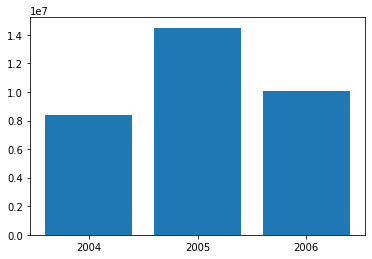

In [84]:
plt.bar(spend_air_year_group['Year'], spend_air_year_group['Amount'])

## 4. c. Comparison of monthly spend for each product

In [85]:
spend_merged.head()

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Age Group,Month2
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult,Jan
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult,Jan
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult,Jan
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult,Jan
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Senior Adult,Jan


In [86]:
product_month_group = spend_merged.groupby(['Product','Month2']).sum().drop(['Sl No:','No','Age','Limit'], axis=1).reset_index()

In [87]:
product_month_group

,Product,Month2,Amount
0,Gold,Apr,13170572.59
1,Gold,Aug,4954030.42
2,Gold,Dec,2332940.96
3,Gold,Feb,24779179.55
4,Gold,Jan,32413831.83
5,Gold,Jul,5167416.37
6,Gold,Jun,6538862.64
7,Gold,Mar,19256972.48
8,Gold,May,21548169.76
9,Gold,Nov,9203267.46


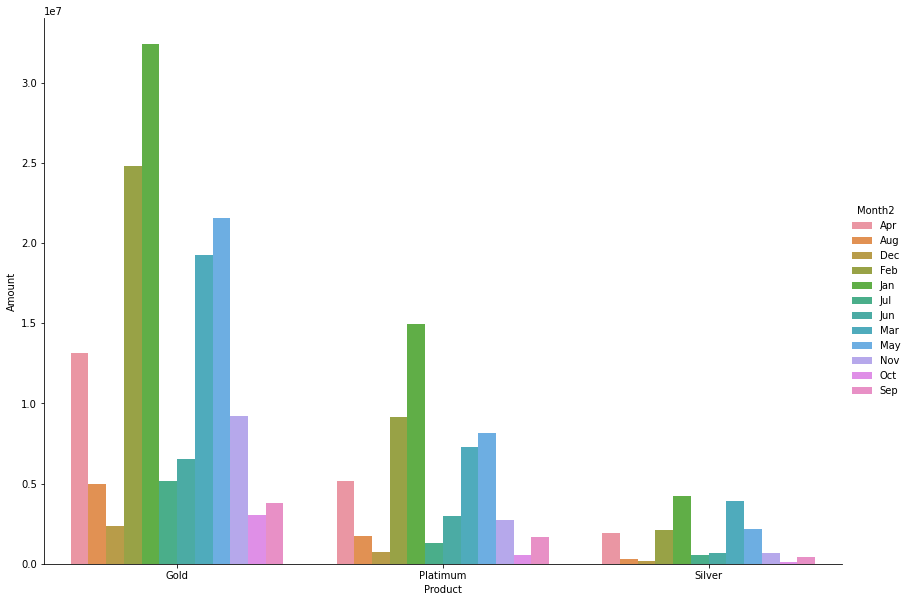

In [88]:
sns.catplot(x = 'Product', y = 'Amount', hue = 'Month2', kind = 'bar', data = product_month_group, height=8.27, aspect=11.7/8.27)

## Seasonality can be clearly observed on all three products with peak spends during January, February and March

# Python Function

In [89]:
repayment_merged.head()

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,NaN,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [90]:
repayment_merged1 = repayment_merged.drop(['SL No:','Unnamed: 4','No','Age','Limit','Company','Segment'], axis=1)
repayment_merged1['Month2'] = repayment_merged1['Month'].str[-6:-3]
repayment_merged1['Year2'] = '20'+repayment_merged1['Month'].str[-2:]

In [91]:
def customers(product, time_period):
    if product == 'Gold' or product == 'Silver' or product == 'Platimum':
        pass
    else:
        print('enter a valid product name: Gold, Silver, Platimum')
        return None
    
    if time_period=='Monthly':
        repayment_merged2 = repayment_merged1[(repayment_merged1['Product']==product)]
        repayment_merged3 = repayment_merged2.groupby(['Month2','City','Customer']).sum().reset_index()
        output_df = repayment_merged3.groupby(['Month2','City']).apply(lambda x: x.sort_values(by="Amount", ascending=False)[:10])\
        .drop(['City','Month2'], axis=1)
        return output_df
    elif time_period=='Yearly':
        repayment_merged2 = repayment_merged1[(repayment_merged1['Product']==product)]
        repayment_merged3 = repayment_merged2.groupby(['Year2','City','Customer']).sum().reset_index()
        output_df = repayment_merged3.groupby(['Year2','City']).apply(lambda x: x.sort_values(by="Amount", ascending=False)[:10])\
        .drop(['City','Year2'], axis=1)
        return output_df
    else:
        print('enter valid time period')
        return None 
    
customers('Gold','Yearly')
#customers('Silver','Monthly')

Customer      Amount
Year2 City                              
2004  BANGALORE  2       A14  2770261.30
                 0        A1  2359797.84
                 1       A13  2337012.77
                 4       A43  1906497.47
                 3       A30   978777.17
                 5       A63   788855.60
      BOMBAY     8       A42  3045914.71
                 6       A12  2339080.90
                 9       A62  1744114.25
                 7       A17  1425448.02
      CALCUTTA   14      A60  2890721.81
                 12      A29  1376793.94
                 11      A15  1051502.61
                 10      A10   892190.53
                 13      A31   407599.13
      CHENNAI    15      A27  1842823.04
                 16      A67    67845.60
      COCHIN     20      A45  2557947.39
                 21      A61  2518154.95
                 18      A16  1122211.16
                 17      A11   958556.39
                 22      A65   468922.60
                 19      A32   344312.67
                 23      A94   153465.89
      DELHI      24      A44  2149383.50
                 25      A93   342326.14
      PATNA      26      A26  1490427.84
                 27      A66   477039.78
                 28      A95   369405.96
      TRIVANDRUM 29      A28   965108.49
...                      ...         ...
2006  BANGALORE  58      A30  2486958.41
                 55       A1   864735.06
                 63      A92   459105.69
                 60      A63   211117.12
                 61      A81   207780.32
                 62      A88   146821.30
      BOMBAY     65      A17  3127783.14
                 64      A12  3118090.96
                 67      A62  1684085.69
                 66      A42  1443787.72
                 68      A91   247781.00
      CALCUTTA   71      A29  3434298.00
                 73      A60  3242712.83
                 70      A15  2783141.43
                 69      A10  1556613.06
                 72      A31  1527798.41
                 74      A89   497237.97
      CHENNAI    75      A27  2387485.81
      COCHIN     80      A61  3744127.41
                 76      A11  2306906.76
                 77      A16  1911369.63
                 79      A45  1847939.91
                 78      A32  1517308.65
                 81      A90   109931.32
      DELHI      82      A44  1430028.85
                 84      A82   342200.74
                 83      A64   323229.09
      PATNA      85      A26  3330421.30
                 86      A66   113094.58
      TRIVANDRUM 87      A28  3376614.65

[88 rows x 2 columns]